# Licencia Notebook
Casting Inteligente: Algoritmos para la selección óptima de actores

Copyright (C) 2024  Alaix, Alvarado, Choconta & Martinez

Este archivo es parte de FilmCast.

FilmCast es software libre: puedes redistribuirlo y/o modificarlo bajo los términos de la Licencia Pública General de GNU tal como fue publicada por la Free Software Foundation, ya sea la versión 3 de la Licencia o cualquier versión posterior.

FilmCast se distribuye con la esperanza de que sea útil, pero SIN NINGUNA GARANTÍA; ni siquiera la garantía implícita de COMERCIABILIDAD o IDONEIDAD PARA UN PROPÓSITO PARTICULAR. Consulta la Licencia Pública General de GNU para más detalles.

Deberías haber recibido una copia de la Licencia Pública General de GNU junto con FilmCast. Si no, consulta https://www.gnu.org/licenses/.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/GPLv3_Logo.svg/1920px-GPLv3_Logo.svg.png" alt="GPL" width="400" height="200">

# Licencia Dataset

Copyright (C) Anthony Therrien [Kaggle](https://www.kaggle.com/datasets/anthonytherrien/a-synthetic-journey-through-10000-actor-profiles/data).

Bajo la licencia CC BY-SA 4.0: Attribution-ShareAlike 4.0 International

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/CC_BY-SA_icon.svg/1200px-CC_BY-SA_icon.svg.png" alt="CC" width="380" height="125">

#  CASTING INTELIGENTE: Algoritmos para la selección óptima de actores
***

# Integrantes
***

1. Alvarado Becerra Ludwig
2. Alaix Perez Andrés
3. Choconta Rojas Daniela
4. Martinez Guerrero Juan Jose


# Objetivos
***

## General

Desarrollar una aplicación que integre un modelo que agrupe las variables cualitativas de los actores mediante clusters, con el fin de identificar y mostrar posibles perfiles que se ajusten a los requerimientos especificados por un productor.

## Específicos

Los objetivos específicos del presente proyecto son:

1. Buscar, limpiar y analizar un set de datos que permita categorizar diferentes perfiles de los actores en base a ciertas caracterısticas establecidas.
2. Utilizar tecnicas de minerıa de datos como el clustering, para categorizar a los actores en distintos grupos segun caracterısticas clave como experiencia y habilidades.
3. Entrenar un modelo que facilite a los productores la busqueda de perfiles de actores, optimizando el proceso de seleccion segun sus necesidades.
4. Facilitar la busqueda de talento a traves de un aplicativo estilo academia, donde se muestren las aptitudes de los actores y a su vez, el productor pueda tener un gran personal para seleccionar.cionar.


# Exploración Inicial del Set de Datos
***

1. Cargar las librerías NumPy y Pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2. Cargar el set de datos desde el archivo .csv

In [2]:
archivo_csv = '../Datasets/Actores.csv'
df = pd.read_csv(archivo_csv, delimiter=';')
perfil = df.to_numpy()

3. Explore los primeros 5 registros (o filas) de su set de datos.

In [7]:
df.head(5)

,Name,Age,Gender,Nationality,Years Active,Genre Specialization,Beauty,Skill Level,Education Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income
0,Anthony Vaughn,19,Female,USA,1,Comedy,9.56,8.24,University,7,52,15678,4914,22,434056.09
1,Justin Osborn,48,Male,USA,19,Drama,7.88,9.61,College,10,37,18420,5378,30,1188216.47
2,Sandra Kim,49,Male,USA,23,Sci-Fi,7.43,9.76,College,12,46,17382,5033,23,1730313.22
3,Mark Hahn,41,Female,USA,15,Sci-Fi,8.08,15.55,Graduate,9,42,16742,5005,25,818967.94
4,Julie Brown,38,Male,USA,19,Action,6.04,9.74,University,11,38,13428,4662,22,974068.97


4. Explore los últimos registros (o filas) de su set de datos.

In [10]:
df.tail(5)

,Name,Age,Gender,Nationality,Years Active,Genre Specialization,Beauty,Skill Level,Education Level,Award Wins,Media Mentions,Social Media Followers,Social Media Likes,Network Size,Income
12484,Christopher Romero,46,Male,USA,19,Comedy,5.79,13.63,University,13,35,16560,5285,26,1415564.10
12485,Joshua Holmes,29,Female,USA,11,Drama,7.59,14.89,University,9,40,16762,5266,18,472303.27
12486,James Johnson,38,Male,USA,12,Action,5.57,6.93,Graduate,7,30,13249,4505,24,564631.95
12487,Michael Rogers,20,Female,Canada,2,Drama,7.15,6.66,Graduate,6,39,17489,5249,23,350355.41
12488,Jeffrey Williams,59,Male,USA,17,Action,5.46,8.98,High School,11,48,19163,5605,31,1242619.92


5. ¿Cuántos registros tiene su set de datos?

In [13]:
num_filas = perfil.shape[0]
print(f"El set de datos tiene {num_filas} registros.")

El set de datos tiene 12489 registros.


6. ¿Cuántos atributos tiene su set de datos?

In [16]:
print(df.columns)
num_columnas = perfil.shape[1]
print(f"\nEl set de datos tiene {num_columnas} columnas.")

Index(['Name', 'Age', 'Gender', 'Nationality', 'Years Active',
       'Genre Specialization', 'Beauty', 'Skill Level', 'Education Level',
       'Award Wins', 'Media Mentions', 'Social Media Followers',
       'Social Media Likes', 'Network Size', 'Income'],
      dtype='object')

El set de datos tiene 15 columnas.


7. ¿De que tipo es cada atributo de su set de datos?

In [19]:
print(df.dtypes)

Name                       object
Age                         int64
Gender                     object
Nationality                object
Years Active                int64
Genre Specialization       object
Beauty                    float64
Skill Level               float64
Education Level            object
Award Wins                  int64
Media Mentions              int64
Social Media Followers      int64
Social Media Likes          int64
Network Size                int64
Income                    float64
dtype: object


8. ¿Cuáles atributos son categóricos y cuáles númericos en su set de datos?

Nuestros atributos categoricos son  aquellos que contienen información que puede clasificarse en categorías como el genero(femenino o masculino), la nacionalidad(USA,Canada), el genero de pelicula en el que se especializan(Drama,Acion,Ciencia Ficcion,Musical,...), el nivel de educación (Univesitario,College,Escuela secundaria,Graduado) y el nombre(no tienen un valor numérico o una ordenación intrínseca que se pueda medir o clasificar de forma cuantitativa)

De la misma manera nuestros atributos numericos son aquellos en la que la información puede expresarse como un número, como la edad, los años activo, la belleza, nivel de habilidad, premios recibidos, numero de menciones en los medios, numero de seguidores en las redes sociales, cantidad de me gusta en las redes sociales, el tamaño de la red e ingresos.ero.

In [9]:
tipo_datos = df.dtypes
categóricos = tipo_datos[tipo_datos == 'object'].index.tolist()
numéricos = tipo_datos[tipo_datos != 'object'].index.tolist()

print("Atributos categóricos:")
print(categóricos)

print("\nAtributos numéricos:")
print(numéricos)

Atributos categóricos:
['Name', 'Gender', 'Nationality', 'Genre Specialization', 'Education Level']

Atributos numéricos:
['Age', 'Years Active', 'Beauty', 'Skill Level', 'Award Wins', 'Media Mentions', 'Social Media Followers', 'Social Media Likes', 'Network Size', 'Income']


9. ¿Cuáles atributos son discretos y cuáles son continuos en su set de datos?

Los atributos discretos son aquellos que toman un número finito o contable de valores y estos generalmente son enteros o categorías que no se pueden dividir en fracciones más pequeñas, en nuestro caso  el `nombre`(cadena de texto categórica), la `edad`(número entero), el `genero`(Female y Male), `Nacionalidad`(USA y Canada), `años activo`(número entero), `Genero en el que se especializa`('Comedy', 'Drama', etc.), `nivel educativo`(University,College, Graduate,High School), `Award Wins`(número entero), `Media Mentions`(número entero), `Social Media Followers`(número entero), `Network Size`(número entero), `Social Media Likes`(número entero).

Los atributos continuos son aquellos que pueden tomar cualquier valor en un rango, generalmente con posibilidad de tener valores decimales como en este caso los atributos `Beauty`(se mide en una escala de habilidad con valores intermedios), `Skill Level`(se mide en una escala de habilidad con valores intermedios), `Income`(cualquier valor en un rango y no se limita a enteros).

10. ¿Qué tipo de set de datos usted(es) tiene(n) para el desarrollo de su proyecto? Justifique su respuesta.

Este *dataset* proviene de [Kaggle](https://www.kaggle.com/datasets/anthonytherrien/a-synthetic-journey-through-10000-actor-profiles/data) bajo una licencia pública, permitiendo su modificación, adaptación, y contruir nuevo conocimiento a partir de estos datos. Entrando en materia de datos, se tienen 15 columnas o variables que se presentan a continuación, indicando su tipo de dato, si es categórico, numérico, discreto, o continuo.

- `Name` | String | Categórico.
- `Age` | Entero | Numérico Discreto.
- `Gender` | String | Categórico.
- `Nationality` | String | Categórico.
- `Years Active` | Entero | Numérico Discreto.
- `Genre Specialization` | String | Categórico.
- `Beauty` | Flotante | Numérico Continuo.
- `Skill Level` | Flotante | Numérico Continuo.
- `Education Level` | String | Categórico.
- `Award Wins` | Entero | Numérico Discreto.
- `Media Mentions` | Entero | Numérico Discreto.
- `Social Media Followers` | Entero | Numérico Discreto.
- `Social Media Likes` | Entero | Numérico Discreto.
- `Network Size` | Entero | Numérico Discreto.
- `Income` | Flotante | Numérico Continuo.

También posee un total de 12489 registros, todo en formato `.csv`. En conclusión, se posee un *dataset* con datos categóricos, numéricos discretos y continuos. Teniendo una diversidad en los datos.

# Algunas Estadísticas del Set de Datos
***

Realice el siguiente análisis por lo menos para **5 atributos númericos** que contenga su set de datos.

1. Calcule el valor promedio.
2. Calcule la mediana.
3. Identifique si el atributo puede o no tener valores atípicos (justifique su respuesta).
4. Calcule el valor mínimo.
5. Calcule el valor máximo.
6. Calcule el primer cuartil.
7. Calcule el tercer cuartil.
8. Calcule el rango intercuatil.
9. Calcule la desviación estándar.
10. Realice una pequeña reseña o análisis con los hallazgo obtenidos después de la exploración estadítica del atributo.

Sea(n) meticuloso(s) en sus cálculos y análisis.
<br><br>

**Nota: Su set de datos por lo menos debe tener 2 o más atributos númericos, de lo contrario debe pensar en cambiar el set de datos u obtener información nueva a partir de los atributos existentes en él para realizar esta sección.**
<br><br>

## Análisis de los Atributos Númericos
***

### Years Active

Promedio de años activos: 12.404916326367204
Mediana de años activos: 13.0


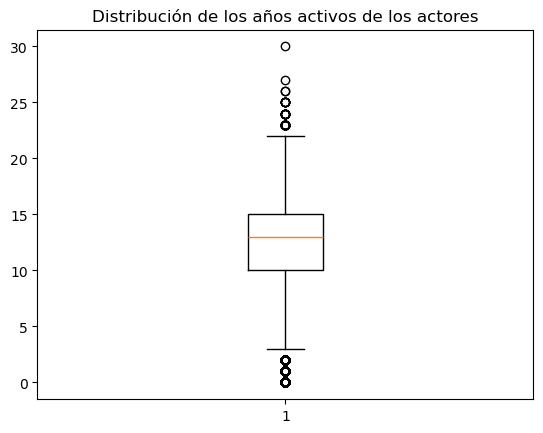

Minimo de años activos: 0
Máximo de años activos: 30
Primer cuartil : 10.0
Tercer cuartil : 15.0
Rango intercuartil : 5.0
Desviación estándar de los años activos: 4.607368639793933


In [22]:
# Seleccione aquí la columna para el análisis.
años = df['Years Active']

# Calcule aquí el valor promedio.
promedio_años = años.mean()
print("Promedio de años activos:", promedio_años)

# Calcule aquí la mediana.
mediana_años = años.median()
print("Mediana de años activos:", mediana_años)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(años)
plt.title('Distribución de los años activos de los actores')
plt.show()

# Calcule aquí el valor mínimo.
años_min = años.min()
print("Minimo de años activos:", años_min)

# Calcule aquí el valor máximo.
maximo_años = años.max()
print("Máximo de años activos:", maximo_años)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(años,25)
tercer_cuartil=np.percentile(años,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)

# Calcule aquí la desviación estándar.
desviacion_estandar = años.std()
print("Desviación estándar de los años activos:", desviacion_estandar)


Para los años activos de los actores, el 50% poseen 13 años o menos, a su vez, el otro 50% tiene más de estos años activo en la industria. Los datos se encuentran en un rango de 0 a 30 años, contando con un *dataset* de actores sin experiencia a otros con mucha. La mayoría de los actores poseen entre 10 y 15 años de experiencia. Sin embargo, existen valores atípicos, actores que poseen más de 22 años, y otros con menos de 4.

### EDAD

Promedio de edad: 36.83233245255825
Mediana de edad: 36.0


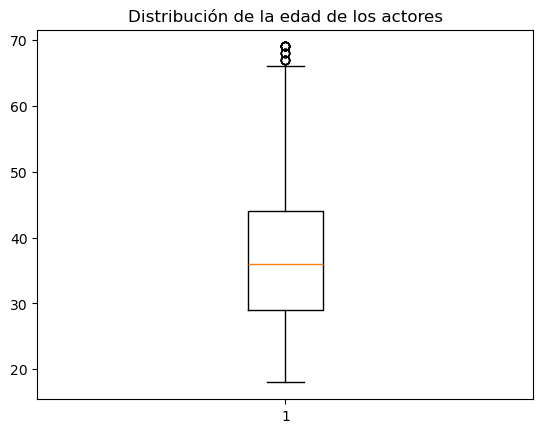

Edad mínima: 18
Edad máxima: 69
Primer cuartil : 29.0
Tercer cuartil : 44.0
Rango intercuartil : 15.0
Desviación estándar de la edad: 10.074581362741656


In [21]:
# Seleccione aquí la columna para el análisis.
edad = df['Age']

# Calcule aquí el valor promedio.
promedio_edad = edad.mean()
print("Promedio de edad:", promedio_edad)

# Calcule aquí la mediana.
mediana_edad = edad.median()
print("Mediana de edad:", mediana_edad)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(edad)
plt.title('Distribución de la edad de los actores')
plt.show()

# Calcule aquí el valor mínimo.
edad_min = edad.min()
print("Edad mínima:", edad_min)

# Calcule aquí el valor máximo.
maximo_edad = edad.max()
print("Edad máxima:", maximo_edad)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(edad,25)
tercer_cuartil=np.percentile(edad,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)

# Calcule aquí la desviación estándar.
desviacion_estandar = edad.std()
print("Desviación estándar de la edad:", desviacion_estandar)

Para la edad de los actores, el 50% poseen 36 años o menos, a su vez, el otro 50% tiene más de esta edad. Los datos se encuentran en un rango de 18 a 69 años, la mayoría de los actores poseen entre 29 y 44 años. Sin embargo, existen valores atípicos, actores que poseen más de 65 años.

### Award Wins


Promedio de premios ganados: 8.241492513411803
Mediana de premios ganados: 8.0


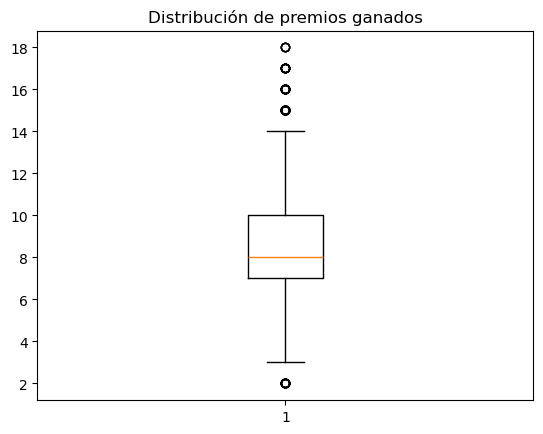

Mínimo de premios ganados: 2
Máximo de premios ganados: 18
Primer cuartil : 7.0
Tercer cuartil : 10.0
Rango intercuartil : 3.0
Desviación estándar de los premios ganados: 2.3094182736386877


In [23]:
# Seleccione aquí la columna para el análisis.
wins = df['Award Wins']

# Calcule aquí el valor promedio.
promedio_wins = wins.mean()
print("Promedio de premios ganados:", promedio_wins)

# Calcule aquí la mediana.
mediana_wins = wins.median()
print("Mediana de premios ganados:", mediana_wins)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(wins)
plt.title('Distribución de premios ganados')
plt.show()

# Calcule aquí el valor mínimo.
minimo_wins = wins.min()
print("Mínimo de premios ganados:", minimo_wins)

# Calcule aquí el valor máximo.
maximo_wins = wins.max()
print("Máximo de premios ganados:", maximo_wins)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(wins,25)
tercer_cuartil=np.percentile(wins,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)


# Calcule aquí la desviación estándar.
desviacion_estandar = wins.std()
print("Desviación estándar de los premios ganados:", desviacion_estandar)

Para la cantidad de premios ganados, el 50% de los actores poseen 8 premios o menos, a su vez, el otro 50% tiene más de este número. Los datos se encuentran en un rango de 2 a 18 premios, lo que quiere decir que todos los actores del *dataset* tienen algún tipo de premio, la mayoría de los actores poseen entre 7 y 10 premios. Sin embargo, existen valores atípicos, actores que poseen más de 14 premios y otros que tienen menos de 3.

### Media Mentions

Promedio de menciones en medios: 38.15277444150853
Mediana de menciones en medios: 38.0


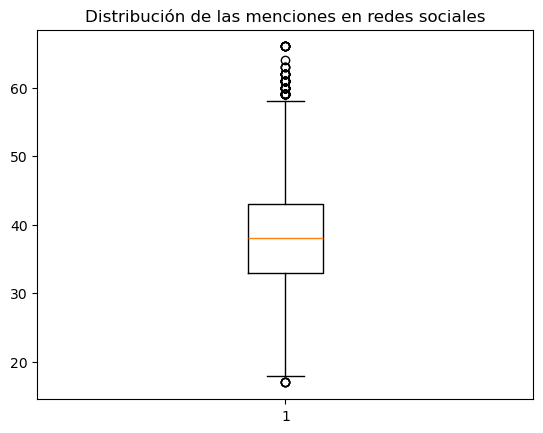

Mínimo de menciones en medios: 17
Máximo de menciones en medios: 66
Primer cuartil : 33.0
Tercer cuartil : 43.0
Rango intercuartil : 10.0
Desviación estándar de las menciones en medios: 7.164023367551682


In [25]:
# Seleccione aquí la columna para el análisis.
mentions = df['Media Mentions']

# Calcule aquí el valor promedio.
promedio_mentions = mentions.mean()
print("Promedio de menciones en medios:", promedio_mentions)

# Calcule aquí la mediana.
mediana_mentions = mentions.median()
print("Mediana de menciones en medios:", mediana_mentions)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(mentions)
plt.title('Distribución de las menciones en redes sociales')
plt.show()

# Calcule aquí el valor mínimo.
minimo_mentions = mentions.min()
print("Mínimo de menciones en medios:", minimo_mentions)

# Calcule aquí el valor máximo.
maximo_mentions = mentions.max()
print("Máximo de menciones en medios:", maximo_mentions)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(mentions,25)
tercer_cuartil=np.percentile(mentions,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)

# Calcule aquí la desviación estándar.
desviacion_estandar = mentions.std()
print("Desviación estándar de las menciones en medios:", desviacion_estandar)


Para las menciones en medios, el 50% de los actores poseen 38 menciones o menos, a su vez, el otro 50% tiene más de este número. Los datos se encuentran en un rango de 17 a 66 menciones en medios, la mayoría de los actores poseen entre 33 y 43 menciones en medios. Sin embargo, existen valores atípicos, actores que poseen más de 60 menciones y otros que tienen menos de 20.

### Social Media Followers

Promedio de seguidores en redes sociales: 16583.698694851468
Mediana de seguidores en redes sociales: 16518.0


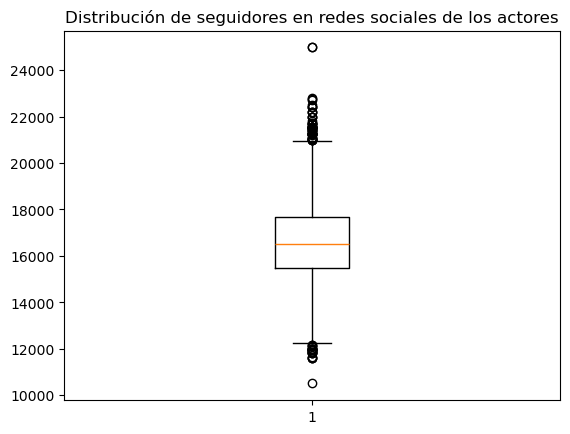

Mínimo de seguidores en redes sociales: 10507
Máximo de seguidores en redes sociales: 24976
Primer cuartil : 15484.0
Tercer cuartil : 17675.0
Rango intercuartil : 2191.0
Desviación estándar de los seguidores en redes sociales: 1610.9462192349927


In [26]:
# Seleccione aquí la columna para el análisis.
followers = df['Social Media Followers']

# Calcule aquí el valor promedio.
promedio_followers = followers.mean()
print("Promedio de seguidores en redes sociales:", promedio_followers)

# Calcule aquí la mediana.
mediana_followers = followers.median()
print("Mediana de seguidores en redes sociales:", mediana_followers)

# Identifique aquí si el atributo puede o no tener valores atípicos
plt.boxplot(followers)
plt.title('Distribución de seguidores en redes sociales de los actores')
plt.show()

# Calcule aquí el valor mínimo.
minimo_followers = followers.min()
print("Mínimo de seguidores en redes sociales:", minimo_followers)

# Calcule aquí el valor máximo.
maximo_followers = followers.max()
print("Máximo de seguidores en redes sociales:", maximo_followers)

# Calcule aquí el primer cuartil,el tercer cuartil y el rango intercuartil.
primer_cuartil=np.percentile(followers,25)
tercer_cuartil=np.percentile(followers,75)
rango_intercuartil=tercer_cuartil-primer_cuartil

print("Primer cuartil :", primer_cuartil)
print("Tercer cuartil :", tercer_cuartil)
print("Rango intercuartil :", rango_intercuartil)

# Calcule aquí la desviación estándar.
desviacion_estandar = followers.std()
print("Desviación estándar de los seguidores en redes sociales:", desviacion_estandar)


Para los seguidores, el 50% de los actores poseen 16518 seguidores o menos, a su vez, el otro 50% tiene más de este número. Los datos se encuentran en un rango de 10507 a 24976 seguidores, la mayoría de los actores poseen seguidores entre 15484 y 17675. Sin embargo, existen valores atípicos, actores que poseen más de 24000 seguidores y otros que tienen menos de 12000.

## Análisis Gráfico


## Scatter Plots:

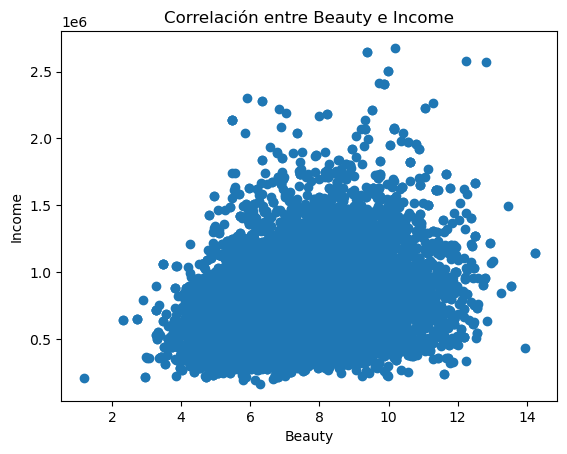

In [21]:
plt.scatter(df['Beauty'], df['Income'])
plt.xlabel('Beauty')
plt.ylabel('Income')
plt.title('Correlación entre Beauty e Income')
plt.show()

Al analizar la relacion que existe entre las variables de "belleza" y "ingreso"; se evidencio que:
- No existe ninuna correlacion lineal 
- Existe una dispersion muy grande de los datos
  
Segun lo anterior se pude concluir que:
- no existe una relacion objetiva entre ambas variables
- La belleza no es predictor o un determinante de los ingresos del actor

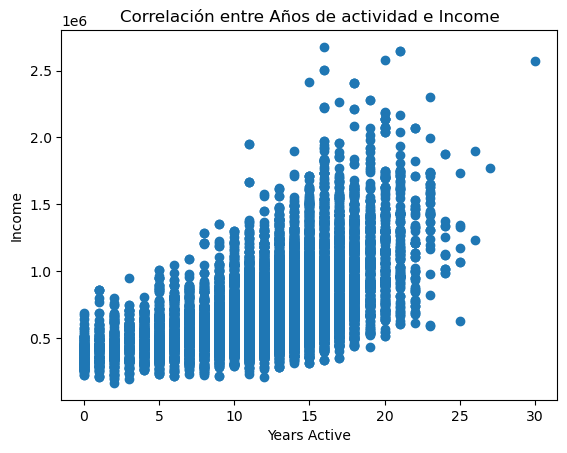

In [89]:
plt.scatter(df['Years Active'], df['Income'])
plt.xlabel('Years Active')
plt.ylabel('Income')
plt.title('Correlación entre Años de actividad e Income')
plt.show()

## Bar Plots

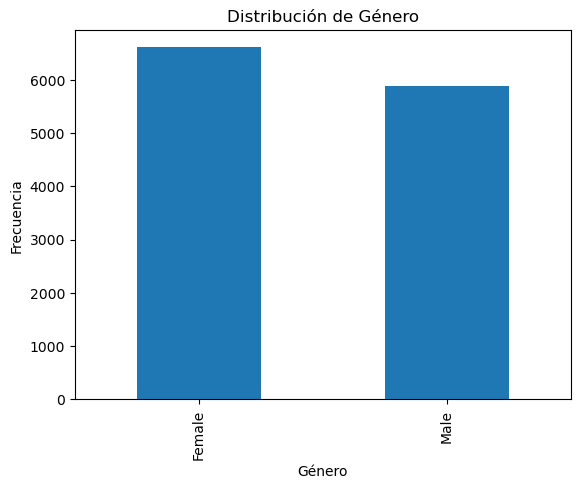

In [41]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Distribución de Género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()


Cada barra representa la cantidad de ndividuos que pertenecen a cada género en el conjunto de datos analizado.
De la grafica podemos concluir que:
- La barra correpondiente al genero femenino es ligeramente mayor encompraracion, con su contra parte 

## Line Plots

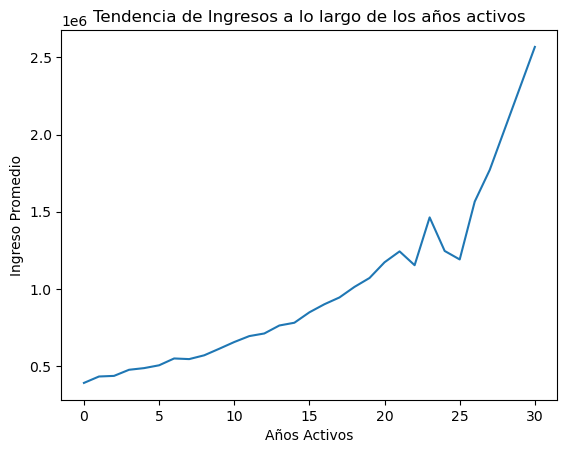

In [47]:
df.groupby('Years Active')['Income'].mean().plot(kind='line')
plt.title('Tendencia de Ingresos a lo largo de los años activos')
plt.xlabel('Años Activos')
plt.ylabel('Ingreso Promedio')
plt.show()

De la anterior grafica, podemos observar que existe una tendecia general ascendente, lo cual suguiere que existe una correlacion positiva entre  los años de actividad y los ingresos promedio
lo que quiere decir que a a mayor se "los años de actividad", mayor ingresos

Un factor a destacar es la presencia en una variacion entre alrededro de los 20-25 años

## Pie Plots

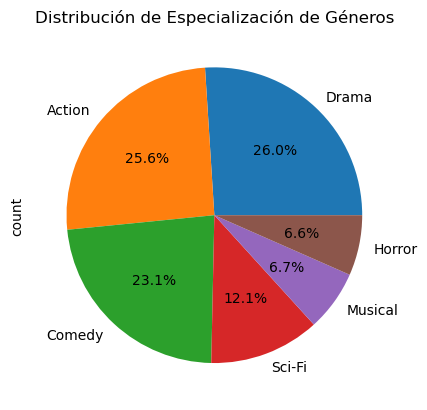

In [49]:
df['Genre Specialization'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Especialización de Géneros')
plt.show()

Podemos observar que los generos drama, comedia y accion, representan aproximadamente el 75% del mercado de los actores del data set, esto puede reflejar una alta demanda en estos tipos de produccciones en la industria

## Histogramas

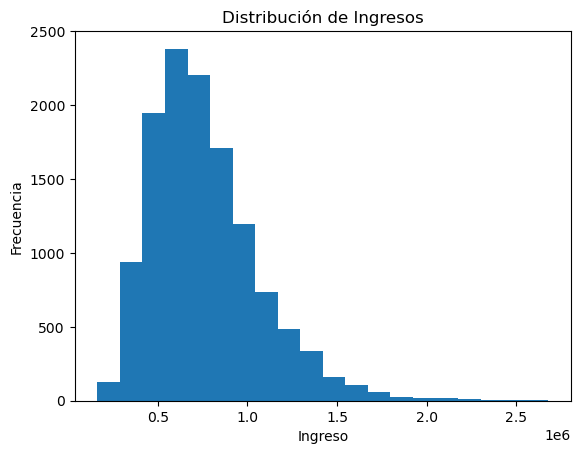

In [57]:
df['Income'].plot(kind='hist', bins=20)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingreso')
plt.ylabel('Frecuencia')
plt.show()


Podemos analisar que:
- Existe una distribución está claramente sesgada hacia la derecha, lo que representa que la gran mayoria de actores tienen ingresos bajos
- La moda de los datos lo encontramos al rededor de las 500.000 unidades

## Box Plots

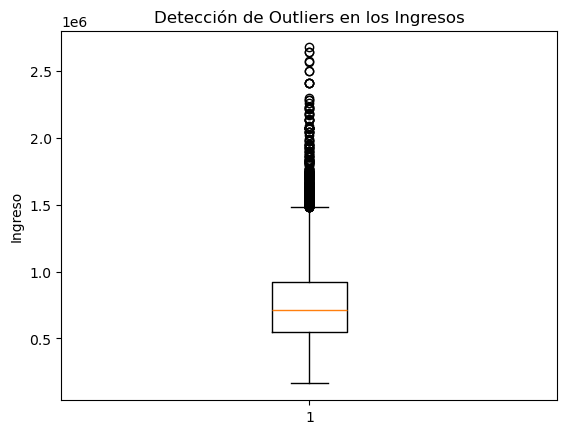

In [67]:
plt.boxplot(df['Income'])
plt.title('Detección de Outliers en los Ingresos')
plt.ylabel('Ingreso')
plt.show()

De la grafica de feterccion de datos atipicos se puede concluir que:
Existe una Distribución Asimetrica; ya que la caja se encuentra mas cerca de limite inferior y los datos atipicos los encontamos por encima de la caja. Esto nos da a entender que la distribución de los ingresos es asimétrica positiva, es decir, hay una cola larga hacia la derecha con algunos ingresos muy altos
